In [1]:
import pyccl as ccl
import joint_cov as jp
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
ell = np.logspace(np.log10(2), 6, 500)
params = {'OmC': 0.25, 'OmB':0.05, 'h':0.68, 'sigma8':0.83, 'n_s':0.96, 'b':2.2 }

In [4]:
gg, gk, kk = jp.get_Cells(params, ell, 'DESI', 'LSST')

In [5]:
sigsq_avg = jp.SigCsq_avg(params, 'DESI', 'LSST')

In [6]:
cosmo = ccl.Cosmology(Omega_c = params['OmC'], Omega_b = params['OmB'], h = params['h'], sigma8=params['sigma8'], n_s = params['n_s'])
chi_eff = ccl.background.comoving_radial_distance(cosmo, 1./(1.+0.77)) * params['h']
np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/chieff_DESI_LSST.txt', [chi_eff])

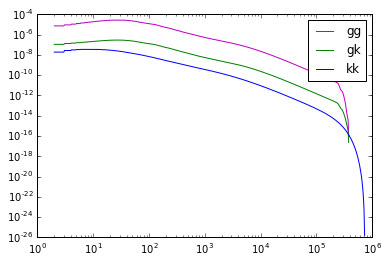

In [7]:
plt.figure()
plt.loglog(ell, gg, 'm', label='gg')
plt.hold(True)
plt.loglog(ell, gk, 'g', label='gk')
plt.hold(True)
plt.loglog(ell, kk, 'b', label='kk')
plt.legend()
plt.show()